In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


In [2]:
data_path = '.data/expression/'

for expression in os.listdir(data_path):
    print(
        str(len(os.listdir(data_path + expression))) + " " + expression +
        " classes")

7 test classes
7 train classes


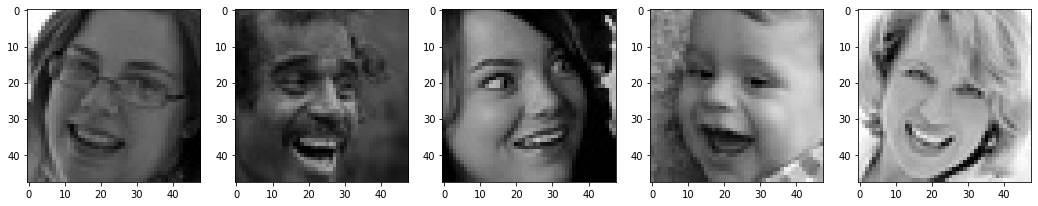

In [27]:
plt.figure(figsize=(18, 10))
for index, img_path in enumerate(glob(data_path + 'train/happy/*.jpg')[:5]):
    image = Image.open(img_path).convert('RGB')
    image = np.array(image)

    plt.subplot(1, 5, index + 1)
    plt.imshow(image)

plt.show()

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)

In [4]:
train_generator = datagen_train.flow_from_directory(data_path + 'train',
                                                    target_size=(img_size,
                                                                 img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(
    data_path + 'test',
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [6]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

C:\Users\HP\miniconda3\envs\image-editing\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history = model.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)

Epoch 1/15
448/448 [==============================] - 279s 621ms/step - loss: 1.8155 - accuracy: 0.3010 - val_loss: 1.6847 - val_accuracy: 0.3397
Epoch 2/15
448/448 [==============================] - 286s 638ms/step - loss: 1.4900 - accuracy: 0.4315 - val_loss: 1.4260 - val_accuracy: 0.4586
Epoch 3/15
448/448 [==============================] - 286s 638ms/step - loss: 1.3355 - accuracy: 0.4858 - val_loss: 1.2210 - val_accuracy: 0.5353
Epoch 4/15
448/448 [==============================] - 285s 637ms/step - loss: 1.2529 - accuracy: 0.5206 - val_loss: 1.2725 - val_accuracy: 0.5208
Epoch 5/15
448/448 [==============================] - 292s 651ms/step - loss: 1.1927 - accuracy: 0.5467 - val_loss: 1.2726 - val_accuracy: 0.5027
Epoch 6/15
448/448 [==============================] - 289s 645ms/step - loss: 1.1528 - accuracy: 0.5605 - val_loss: 1.1396 - val_accuracy: 0.5671
Epoch 7/15
448/448 [==============================] - 281s 626ms/step - loss: 1.1194 - accuracy: 0.5751 - val_loss: 1.3285 -

In [30]:
model.save('face_expression_model.h5')